**Hola!**

Mi nombre es Enrique Romero

<div class="alert alert-danger">
<b>️⚠️  Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as ans
import math
import seaborn as sns
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
display(plans)
plans.info()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
display(plans[["plan_name","usd_monthly_pay", "mb_per_month_included"]])



,plan_name,usd_monthly_pay,mb_per_month_included
0,surf,20,15360
1,ultimate,70,30720


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Veo que los datos corresponden a lo que se menciona en el ejercicio los precios y los paquetes estan tal cual lo que indica el proyecto:
*Surf

Pago mensual: 20$.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: 10$.
*Ultimate

Pago mensual: 70$.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: 7$.   

los datos de MB estan bien ya que (1 GB = 1024 megabytes). El cambio que haria es cambiar de posicion la columna plan_name . ponerla de primeras, ya que veo que estando de ultimas se pierde un poco la informacion del tipo de plan Mobil.

por otro lado viendo la informacion de las columnas veo que estan bien los tipos de datos que contienen . por ejmplo para los  float64 son decimales por eso estan asi.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans= plans.reindex(columns=["plan_name","messages_included","mb_per_month_included","minutes_included","usd_monthly_pay","usd_per_gb","usd_per_message","usd_per_minute"])
display(plans)

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
display(users.head(30))
users.info()
users[users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [7]:
# Imprime una muestra de datos para usuarios
users[users["churn_date"].isna()]



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

validando que en data frame users no hay datos o nombres duplicados. la unica inconsistencia que encontramos es que en la columna churn_date . la cual corresponde a la fecha en la cual algun usuario dejo de cancelar el servicio o se retiro, encontramos que 34 usuarios cuentan con fecha de cancelacion. lo cual podria afectar el analisis de datos ya que fueron usuarios que dejaron de tomar el servicio  y no estan activos actualemente.

realizare un dataframe nuevo con nombre Users2 el cual contiene el tipo de plan que tiene cada usuario asignado, ya que este dato se requiere en el momento de hacer investigacion en uno de los ejercicios de mas abajo del proyecto.


<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo.</div>

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
columnas=["user_id","plan","city"]
users2=users[[*columnas]]
users2

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
display(calls)
calls.info()
calls[calls.duplicated()]

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration


In [10]:
# Imprime una muestra de datos para las llamadas
calls.sample(10) 

,id,user_id,call_date,duration
105502,1372_39,1372,2018-12-19,1.64
54954,1196_852,1196,2018-05-23,0.00
114328,1400_680,1400,2018-03-26,1.67
70518,1251_529,1251,2018-10-21,8.48
29234,1110_285,1110,2018-07-03,4.22
71264,1254_69,1254,2018-12-19,9.80
48792,1175_483,1175,2018-11-14,2.70
117814,1412_98,1412,2018-10-30,4.21
100547,1359_429,1359,2018-03-09,8.01
119068,1415_116,1415,2018-10-23,5.68


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


Podemos observar en Dt Calls el numero marcado, el usuario que realizo la llamada, la fecha y la duracion en minutos.
El cambio que realizaria es en la columna Duration la cual esta en tipo float64. la modificaria por un dato entero ya que los datos son en minutos. si fuera en minutos y segundos depronto si aplicaria. pero al ser en minutos seria un entero.
tambien la columna 'call_date' debe ser tipo de datos datetime ya que es una fecha, por tal razon se hace la correccion.

se utiliza el metodo .apply(np.ceil) para la columna duration. con el fin de que aproxime los minutos al numero entero mas proximo y asi redonde los minutos

por otro lado agregare una columna month la cual corresponde al mes de la llamada, ya que necesitaremos este mes para poder hacer una muestra de datos en los proximos ejercicios del proyecto.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]


In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype(float).astype(int)

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

display(calls.sample(10))
calls.info()

,id,user_id,call_date,duration
134863,1489_191,1489,2018-09-19,15
23471,1085_263,1085,2018-12-13,0
37113,1140_397,1140,2018-09-10,18
95099,1337_25,1337,2018-12-20,11
192,1001_343,1001,2018-10-26,6
134881,1489_209,1489,2018-12-16,10
130885,1470_334,1470,2018-07-18,15
134621,1488_919,1488,2018-07-01,12
86059,1317_82,1317,2018-12-02,14
126244,1447_109,1447,2018-12-31,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [12]:
calls['month'] = calls['call_date'].dt.month

<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo.</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

agregamos el nuevo dataframe calls1 anexando la informacion de plan la cual teniamos ya registrada con el dataframe users2

In [13]:
calls['month'] = calls['month'].astype(int).astype(object)
calls1=pd.merge( users2 ,calls ,  on= "user_id", how="right")
calls1

,user_id,plan,city,id,call_date,duration,month
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_93,2018-12-27,9,12
1,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_145,2018-12-27,14,12
2,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_247,2018-12-27,15,12
3,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_309,2018-12-28,6,12
4,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_380,2018-12-30,5,12
...,...,...,...,...,...,...,...
137730,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_199,2018-11-21,9,11
137731,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_200,2018-10-20,11,10
137732,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_201,2018-09-21,9,9
137733,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_202,2018-10-10,1,10


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
display(messages)
messages.info()
messages[messages.duplicated()]

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date


In [15]:
# Imprime una muestra de datos para los mensajes
total_messages=messages["user_id"].value_counts()
df_totalmessagesxuser=pd.concat([total_messages],axis=1)
display(df_totalmessagesxuser.head(10))

,user_id
1132,1288
1328,1233
1324,1175
1470,1056
1077,804
1028,756
1076,740
1336,690
1362,672
1335,654


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

podemos observar que se enviaron un total de 76.051 mensajes de texto, de los cuales el usuario 1132 fue el que mas mensajes de texto envio con un total de 1288. segido por el usuario 1328 quien envio 1233 mensajes de texto.

debemos corregir el tipo de dato para la columna message_date la cual viene como objeto. pero al ser una fecha debe ser datatime.
por ultimo de igual manera insertaremos una nueva columna correspondiente al mes de enviado el mensaje. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
messages["message_date"] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
messages['month'] = messages["message_date"].dt.month
messages.sample(10)

,id,user_id,message_date,month
13742,1091_59,1091,2018-11-25,11
72561,1470_189,1470,2018-11-13,11
21800,1132_1291,1132,2018-04-15,4
28279,1174_69,1174,2018-11-20,11
28687,1174_477,1174,2018-07-13,7
23134,1139_288,1139,2018-11-29,11
70236,1456_167,1456,2018-07-02,7
42619,1280_115,1280,2018-10-03,10
69809,1454_171,1454,2018-11-19,11
63523,1405_213,1405,2018-11-11,11


In [18]:
messages['month'] = messages['month'].astype(int).astype(object)

In [19]:
messages1=pd.merge( users2 , messages ,  on= "user_id", how="right")
messages1

,user_id,plan,city,id,message_date,month
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_125,2018-12-27,12
1,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_160,2018-12-31,12
2,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_223,2018-12-31,12
3,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_251,2018-12-27,12
4,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_255,2018-12-26,12
...,...,...,...,...,...,...
76046,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",1497_526,2018-12-24,12
76047,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",1497_536,2018-12-24,12
76048,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",1497_547,2018-12-31,12
76049,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",1497_558,2018-12-24,12


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
display(internet)
internet.info()
internet[internet.duplicated()]

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used


In [21]:
# Imprime una muestra de datos para el tráfico de internet
total_internet=internet.groupby("user_id")["mb_used"].sum().sort_index(ascending=True)
display(total_internet.head(20))

user_id
1000      1901.47
1001     80437.94
1002     40293.33
1003     27044.14
1004    156352.81
1005     17140.17
1006     34187.19
1007    143852.74
1008     55473.04
1009    187237.74
1010    137342.24
1011    131778.60
1012     25811.97
1013     20113.92
1014      8968.00
1015     17495.12
1016     59359.25
1017     95315.32
1018     41379.43
1019     31140.68
Name: mb_used, dtype: float64

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

para el dataframe Internet. encontramos la fecha , usuario y cantidad de internet usado. realice un agrupamiento por usuario que me indicara la totalidad de datos consumidos. esta informacion fue grabada en total_internet.alli podemos observar que este tipo de datos para las mg estan como Float. 
por esta razon la unica correccion que realice fue cambiar por int. para que al realizar la suma diera un valor entero y asi poder cruzar con los megabytes los cuales vienen en entero.
por otro lado vemos que la columna session_date  esta como tipo de datos Objet, debe ser modificada por dataframe, de igual manera ingresaremos una nueva columna con nombre month . la cual incluira el mes del uso de los datos por cada usuario.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
internet['mb_used'] = internet['mb_used'].astype(float).astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet['month'] = internet['month'].astype(int).astype(object)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89,12
1,1000_204,1000,2018-12-31,0,12
2,1000_379,1000,2018-12-28,660,12
3,1000_413,1000,2018-12-26,270,12
4,1000_442,1000,2018-12-27,880,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218,10
104821,1499_216,1499,2018-12-30,304,12
104822,1499_217,1499,2018-09-22,292,9
104823,1499_218,1499,2018-12-07,0,12


In [24]:
internet1=pd.merge( users2 , internet ,  on= "user_id", how="right")
internet1

,user_id,plan,city,id,session_date,mb_used,month
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_13,2018-12-29,89,12
1,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_204,2018-12-31,0,12
2,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_379,2018-12-28,660,12
3,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_413,2018-12-26,270,12
4,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000_442,2018-12-27,880,12
...,...,...,...,...,...,...,...
104820,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_215,2018-10-20,218,10
104821,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_216,2018-12-30,304,12
104822,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_217,2018-09-22,292,9
104823,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",1499_218,2018-12-07,0,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

datos= [["surf",20,500,50,15,0.33,0.33,10],
        ["ultimate",70,3000,1000,30,0.10,0.10,7]]

plan = [ "surf" , "ultimate"]

encabezados =[ "plan",'costomensual', 'minutosmensual', 'mensajesmensual',"gbmensual","minutoadicional","mensajeadicional","GBadicional"]


planes = pd.DataFrame(datos , index = plan ,columns=encabezados)

display(planes)


,plan,costomensual,minutosmensual,mensajesmensual,gbmensual,minutoadicional,mensajeadicional,GBadicional
surf,surf,20,500,50,15,0.33,0.33,10
ultimate,ultimate,70,3000,1000,30,0.10,0.10,7


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_xmes=calls1.groupby(["user_id","plan","city"])["month"].value_counts()
display(llamadas_xmes)

user_id  plan      city                                       month
1000     ultimate  Atlanta-Sandy Springs-Roswell, GA MSA      12       16
1001     surf      Seattle-Tacoma-Bellevue, WA MSA            10       65
                                                              11       64
                                                              12       56
                                                              9        49
                                                                       ..
1498     surf      New York-Newark-Jersey City, NY-NJ-PA MSA  5        35
1499     surf      Orlando-Kissimmee-Sanford, FL MSA          12       65
                                                              10       53
                                                              11       45
                                                              9        41
Name: month, Length: 2258, dtype: int64

In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_xmes=calls1.groupby(["user_id","plan","month"])["duration"].sum()
display(minutos_xmes)

user_id  plan      month
1000     ultimate  12       124
1001     surf      8        182
                   9        315
                   10       393
                   11       426
                           ... 
1498     surf      12       339
1499     surf      9        346
                   10       385
                   11       308
                   12       496
Name: duration, Length: 2258, dtype: int64

In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_xmes=messages1.groupby(["user_id","plan"])["month"].value_counts()
display(mensajes_xmes)


user_id  plan      month
1000     ultimate  12       11
1001     surf      10       53
                   9        44
                   12       44
                   11       36
                            ..
1496     surf      10       18
                   11       13
                   12       11
                   8         2
1497     ultimate  12       50
Name: month, Length: 1806, dtype: int64

In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_xmes=internet1.groupby(["user_id","plan","month"])["mb_used"].sum()
display(internet_xmes)


user_id  plan      month
1000     ultimate  12        1899
1001     surf      8         6908
                   9        13294
                   10       22308
                   11       18477
                            ...  
1498     surf      12       23106
1499     surf      9        12967
                   10       19465
                   11       16793
                   12       22034
Name: mb_used, Length: 2277, dtype: int64

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusion= pd.merge( llamadas_xmes, minutos_xmes,right_index=True,left_index=True)
fusion2= pd.merge( fusion, mensajes_xmes ,right_index=True,left_index=True)
fusion3 = pd.merge( fusion2, internet_xmes ,right_index=True,left_index=True)
display(fusion3)

month_x  \
user_id plan     month city                                              
1000    ultimate 12    Atlanta-Sandy Springs-Roswell, GA MSA        16   
1001    surf     10    Seattle-Tacoma-Bellevue, WA MSA              65   
                 11    Seattle-Tacoma-Bellevue, WA MSA              64   
                 12    Seattle-Tacoma-Bellevue, WA MSA              56   
                 9     Seattle-Tacoma-Bellevue, WA MSA              49   
...                                                                ...   
1496    surf     10    New Orleans-Metairie, LA MSA                 46   
                 12    New Orleans-Metairie, LA MSA                 40   
                 11    New Orleans-Metairie, LA MSA                 39   
                 8     New Orleans-Metairie, LA MSA                 18   
1497    ultimate 12    Los Angeles-Long Beach-Anaheim, CA MSA       54   

                                                               duration  \
user_id plan     month city                                               
1000    ultimate 12    Atlanta-Sandy Springs-Roswell, GA MSA        124   
1001    surf     10    Seattle-Tacoma-Bellevue, WA MSA              393   
                 11    Seattle-Tacoma-Bellevue, WA MSA              426   
                 12    Seattle-Tacoma-Bellevue, WA MSA              412   
                 9     Seattle-Tacoma-Bellevue, WA MSA              315   
...                                                                 ...   
1496    surf     10    New Orleans-Metairie, LA MSA                 317   
                 12    New Orleans-Metairie, LA MSA                 294   
                 11    New Orleans-Metairie, LA MSA                 308   
                 8     New Orleans-Metairie, LA MSA                 122   
1497    ultimate 12    Los Angeles-Long Beach-Anaheim, CA MSA       300   

                                                               month_y  \
user_id plan     month city                                              
1000    ultimate 12    Atlanta-Sandy Springs-Roswell, GA MSA        11   
1001    surf     10    Seattle-Tacoma-Bellevue, WA MSA              53   
                 11    Seattle-Tacoma-Bellevue, WA MSA              36   
                 12    Seattle-Tacoma-Bellevue, WA MSA              44   
                 9     Seattle-Tacoma-Bellevue, WA MSA              44   
...                                                                ...   
1496    surf     10    New Orleans-Metairie, LA MSA                 18   
                 12    New Orleans-Metairie, LA MSA                 11   
                 11    New Orleans-Metairie, LA MSA                 13   
                 8     New Orleans-Metairie, LA MSA                  2   
1497    ultimate 12    Los Angeles-Long Beach-Anaheim, CA MSA       50   

                                                               mb_used  
user_id plan     month city                                             
1000    ultimate 12    Atlanta-Sandy Springs-Roswell, GA MSA      1899  
1001    surf     10    Seattle-Tacoma-Bellevue, WA MSA           22308  
                 11    Seattle-Tacoma-Bellevue, WA MSA           18477  
                 12    Seattle-Tacoma-Bellevue, WA MSA           19345  
                 9     Seattle-Tacoma-Bellevue, WA MSA           13294  
...                                                                ...  
1496    surf     10    New Orleans-Metairie, LA MSA              14269  
                 12    New Orleans-Metairie, LA MSA              16419  
                 11    New Orleans-Metairie, LA MSA               8535  
                 8     New Orleans-Metairie, LA MSA               8594  
1497    ultimate 12    Los Angeles-Long Beach-Anaheim, CA MSA    11093  

[1759 rows x 4 columns]

In [31]:
fusion3.rename(columns={'month_x':'llamadashechas',
                        'duration':'duracionllamadasxmin',
                        "month_y": "mensajes_enviados",
                        "mb_used":"megabytes_usadas"
                       
                       },
               inplace=True)
fusion3.reset_index(inplace=True)


In [32]:
# Añade la información de la tarifa
Tarifa=fusion3.merge(planes,how="left",on="plan")
Tarifa
Tarifa["GB_usadas"] = np.ceil(Tarifa["megabytes_usadas"]/1024)

Tarifa["diferenciaenminutos"] =Tarifa["duracionllamadasxmin"]-Tarifa["minutosmensual"]    
Tarifa["diferenciaenminutos"] = np.where(Tarifa["diferenciaenminutos"]<0,0,Tarifa["diferenciaenminutos"]) 
Tarifa["valoradicionalenminutos"] =Tarifa["diferenciaenminutos"]*Tarifa["minutoadicional"]
Tarifa["diferenciaenmsm"] =Tarifa["mensajes_enviados"]-Tarifa["mensajesmensual"]    
Tarifa["diferenciaenmsm"] = np.where(Tarifa["diferenciaenmsm"]<0,0,Tarifa["diferenciaenmsm"])
Tarifa["valoradicionalenmsm"] =Tarifa["diferenciaenmsm"]*Tarifa["mensajeadicional"]
Tarifa["diferenciaengb"] =Tarifa["GB_usadas"]-Tarifa["gbmensual"]  
Tarifa["diferenciaengb"] = np.where(Tarifa["diferenciaengb"]<0,0,Tarifa["diferenciaengb"])
Tarifa["valoradicionalengb"] =Tarifa["diferenciaengb"]*Tarifa["GBadicional"]
Tarifa["Valortotalpagadoporusuario"] = Tarifa["valoradicionalengb"] + Tarifa["valoradicionalenmsm"] + Tarifa["valoradicionalenminutos"]+ Tarifa["costomensual"]

In [33]:
Tarifa

,user_id,plan,month,city,llamadashechas,duracionllamadasxmin,mensajes_enviados,megabytes_usadas,costomensual,minutosmensual,...,mensajeadicional,GBadicional,GB_usadas,diferenciaenminutos,valoradicionalenminutos,diferenciaenmsm,valoradicionalenmsm,diferenciaengb,valoradicionalengb,Valortotalpagadoporusuario
0,1000,ultimate,12,"Atlanta-Sandy Springs-Roswell, GA MSA",16,124,11,1899,70,3000,...,0.10,7,2.0,0,0.0,0,0.00,0.0,0.0,70.00
1,1001,surf,10,"Seattle-Tacoma-Bellevue, WA MSA",65,393,53,22308,20,500,...,0.33,10,22.0,0,0.0,3,0.99,7.0,70.0,90.99
2,1001,surf,11,"Seattle-Tacoma-Bellevue, WA MSA",64,426,36,18477,20,500,...,0.33,10,19.0,0,0.0,0,0.00,4.0,40.0,60.00
3,1001,surf,12,"Seattle-Tacoma-Bellevue, WA MSA",56,412,44,19345,20,500,...,0.33,10,19.0,0,0.0,0,0.00,4.0,40.0,60.00
4,1001,surf,9,"Seattle-Tacoma-Bellevue, WA MSA",49,315,44,13294,20,500,...,0.33,10,13.0,0,0.0,0,0.00,0.0,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,surf,10,"New Orleans-Metairie, LA MSA",46,317,18,14269,20,500,...,0.33,10,14.0,0,0.0,0,0.00,0.0,0.0,20.00
1755,1496,surf,12,"New Orleans-Metairie, LA MSA",40,294,11,16419,20,500,...,0.33,10,17.0,0,0.0,0,0.00,2.0,20.0,40.00
1756,1496,surf,11,"New Orleans-Metairie, LA MSA",39,308,13,8535,20,500,...,0.33,10,9.0,0,0.0,0,0.00,0.0,0.0,20.00
1757,1496,surf,8,"New Orleans-Metairie, LA MSA",18,122,2,8594,20,500,...,0.33,10,9.0,0,0.0,0,0.00,0.0,0.0,20.00


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [34]:
# Calcula el ingreso mensual para cada usuario
ingresomensualxusuario=Tarifa.groupby(["month","user_id","plan"])["Valortotalpagadoporusuario"].sum().reset_index()
ingresomensualxusuario.head(15)


,month,user_id,plan,Valortotalpagadoporusuario
0,1,1077,ultimate,70.00
1,1,1196,ultimate,70.00
2,1,1214,ultimate,70.00
3,1,1362,surf,20.00
4,2,1077,ultimate,70.00
5,2,1099,surf,20.00
6,2,1138,surf,30.00
7,2,1155,ultimate,70.00
8,2,1196,ultimate,70.00
9,2,1214,ultimate,70.00


en el dataframe ingresomensualxusuario. podemos ver la cantidad de dinero que pagaron los usuarios por su respectivo plan mensualmente. teniendo en cuenta las gb adicionales, mensajes de texto y minutos que los usuarios gastaron de mas a lo largo del año.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

graficobarras = Tarifa.pivot_table(index= "month", columns = "plan" , values= "duracionllamadasxmin")
graficobarras


plan,surf,ultimate
month,,
1,292.000000,197.666667
2,331.200000,486.800000
3,344.937500,415.285714
4,366.228571,322.750000
5,443.981132,410.190476
6,425.514286,370.918919
7,452.101124,439.638298
8,427.873950,436.438596
9,426.020408,437.591549


<AxesSubplot:xlabel='month'>

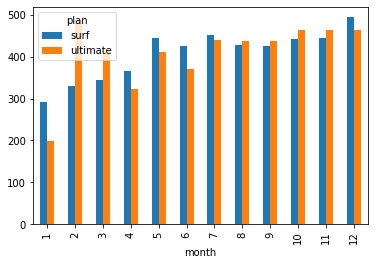

In [36]:
graficobarras.plot(kind="bar")

en la Grafica de barras podemos observar que para el mes de febrero en el plan Ultimate. fue donde mas llamadas en promedio se realizaron por usuario con un promedio de 486 llamadas . y el promedio mas alto para el plan surf fue para Diciembre con un total de 495 llamadas promedio.
por otro lado podemos observar que los 500 minutos mensuales que ofrece el plan surf es un buen plan. ya que los usuarios no estan superando en promedio a este valor. por otro lado 3000 minutos es un valor muy elevado para los usuarios de plan ultimate. ya que no utilizan  ni el 16% del total de minutos que ofrece el plan.

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

graficohist= Tarifa.pivot(index= ["user_id", "month"], columns = "plan" , values= "duracionllamadasxmin")
graficohist.reset_index()
graficohist.fillna(0)

plan            surf  ultimate
user_id month                 
1000    12       0.0     124.0
1001    8      182.0       0.0
        9      315.0       0.0
        10     393.0       0.0
        11     426.0       0.0
...              ...       ...
1496    9      414.0       0.0
        10     317.0       0.0
        11     308.0       0.0
        12     294.0       0.0
1497    12       0.0     300.0

[1759 rows x 2 columns]

array([[<AxesSubplot:title={'center':'surf'}>,
        <AxesSubplot:title={'center':'ultimate'}>]], dtype=object)

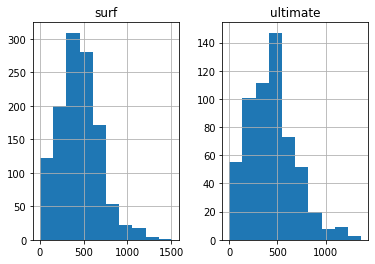

In [38]:
graficohist.hist()

podemos observar que para el plan surf el histograma se centra en 500 minutos hacia atras, lo cual indica que los usuarios que tienen este plan utilizan con mayor frecuencia la cantidad de minutos que el plan contiene. al contrario podemos observar que ultimate contiene un consumo superando los 550 minutos. peo ese es su punto maximo, teniendo en cuenta que este plan es de 3000 minutos, podemos observar que los usuarios que tienen este plan no disfrutan en su totalidad la cantidad de minutos comprado en el plan.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media = graficohist.mean()

f"media es igual a", media


('media es igual a',
 plan
 surf        445.775424
 ultimate    442.512953
 dtype: float64)

al realizar la media de llamadas por minuto para los dos planes , podemos concluir que hay una similitud muy parecida en el numero de minutos consumidos por usuarios de cada plan. para surf la media de minutos utilizados es de 445 minutos y para el plan ultimate es de 442 Minutos.

In [40]:
variance = np.std(graficohist)
f"variance es igual a", variance

('variance es igual a',
 plan
 surf        235.105360
 ultimate    249.360822
 dtype: float64)

la dispercion de datos con respecto a la media para surf es de 235 minutos y para ultimate 249 monitos

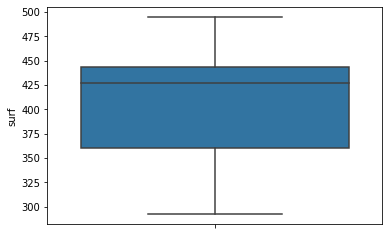

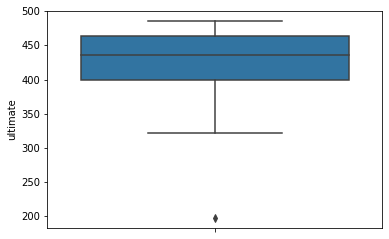

In [41]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
caja = Tarifa.pivot_table(index= "month", columns = "plan" , values= "duracionllamadasxmin")
caja['surf'] = caja['surf'].astype(float).astype(int)
caja['ultimate'] = caja['ultimate'].astype(float).astype(int)
sns.boxplot(y= caja["surf"]);
plt.show()
sns.boxplot(y=  caja["ultimate"]);
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Podemos observar la distribucion de los valores en minutos por cada plan. miramos que para el plan Ultimate los usuarios estan utilizando entre 400 a 450 minutos por mes. y para el plan Surf el rango se comprenden entre 370 a 440 minutos.
 
por otro lado el Plan surf la mayor proporcion de muestra se centra entre 370 a 425 minutos por usuario. es decir que este es el rango en el cual los usuarios tienden en promedio a utilizar minutos mensualmente.

con el diagrama de Bigotes podemos observar la distribuccion de los valores no atipicos. es decir vemos la cantidad de minutos que mas se genero por usuario. donde los datos mas se centraron para cada uno de los planes. 


<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo.</div>

### Mensajes

In [42]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msnmensualesxplan=Tarifa.groupby(["plan","month"])["mensajes_enviados"].sum()
msnmensualesxplan=msnmensualesxplan.reset_index()
msnmensualesxplan


,plan,month,mensajes_enviados
0,surf,1,21
1,surf,2,108
2,surf,3,351
3,surf,4,864
4,surf,5,1778
5,surf,6,2292
6,surf,7,3096
7,surf,8,4439
8,surf,9,5672
9,surf,10,7507


In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
gbmensualesxplan=Tarifa.groupby(["plan"])["GB_usadas"].sum()
gbmensualesxplan=gbmensualesxplan.reset_index()
gbmensualesxplan


,plan,GB_usadas
0,surf,19742.0
1,ultimate,10030.0


In [44]:
media2 = gbmensualesxplan["GB_usadas"].mean()
media2

14886.0

podemos concluir que los usuarios que mas utlizan internet anualmente .son los usuarios de plan Surf. es importante recalcar que este plan es el plan mas basico.que solo cuenta con 15 Gb mensuales por usuario. lo cual nos indica que es probable que en este plan se hayan generado bastante consumo adicional de Gb mensuales.

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [45]:
adicional_internet = Tarifa.pivot_table(index= "month", columns = "plan" , values= "diferenciaengb",aggfunc="sum")
adicional_internet

plan,surf,ultimate
month,,
1,0.0,0.0
2,1.0,0.0
3,28.0,8.0
4,67.0,7.0
5,150.0,3.0
6,212.0,10.0
7,348.0,16.0
8,504.0,20.0
9,518.0,13.0


podemos observar que las los usuarios del plan surft fueron los que mas consumo adicional de internet en Gb tubieron a lo largo del año, esto se debe a que el plan surf solo tiene 15 GB de datos mensuales, podemos ibservar que para el mes 12 la cantidad de gigas adicionales fue de 1.118 gb lo cual es demasiado. estas 1.118 gb adicionales para diciembre significaron una facturacion adicional de 11.118 usd para este periodo por el plan surf, en definitiva podemos observar que los consumos de internet adcional generan un buen ingreso para los planes surf

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [46]:
graficoingresos = ingresomensualxusuario.pivot_table(index= "month", columns = "plan" , values= "Valortotalpagadoporusuario",aggfunc="sum")
graficoingresos

plan,surf,ultimate
month,,
1,20.00,210.0
2,215.27,350.0
3,783.15,546.0
4,1927.70,1169.0
5,3939.73,1491.0
6,4902.37,2660.0
7,7688.47,3402.0
8,10077.49,4130.0
9,10957.34,5061.0


<AxesSubplot:xlabel='month'>

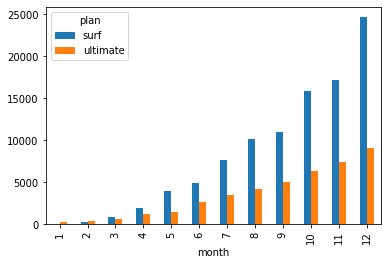

In [47]:
graficoingresos.plot(kind="bar")

podemos observar que los Mayores ingresos se presenta en el plan surf. el cual para el mes de diciembre se tubo el mayor ingreso con 24.672 usd y para la el mismo periodo para el plan ultimate se recaudo 9093 usd. es decir que el valor recaudado por ultimate para el mes de diciembre corresponde al 36% del valor que Surf recaudo para el mismo periodo.	

In [48]:
display(graficoingresos.sum())

plan
surf        98127.59
ultimate    41818.00
dtype: float64

In [49]:
usuariosxplan = ingresomensualxusuario.pivot_table(index= "month", columns = "plan" , values= "Valortotalpagadoporusuario",aggfunc="count")
usuariosxplan


plan,surf,ultimate
month,,
1,1,3
2,5,5
3,16,7
4,35,16
5,53,21
6,70,37
7,89,47
8,119,57
9,147,71


In [50]:
usuariosxplan.sum()

plan
surf        1180
ultimate     579
dtype: int64

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]


El total de de ingresos por los dos planes es de 139.945,59 usd Para el año 2018. de los cuales el ingreso por el plan ultimate corresponde al 29.9 % . mientras el ingreso de surf corresponde al 70.1%.
lo que podemos concluir es que efectivamente hay mas ingresos para el plan surf ya que hay mas usuarios registrados bajo este plan para cada uno de los meses a excepcion del mes de enero en el cual habian 3 usuarios en el plan ultimate y 1 en el plan surf. 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


H0 : LOS INGRESOS PROMEDIOS DE LOS USUARIOS QUE CORRESPONDEN A LOS PLANES ULTIMATE Y SURF SON IGUALES

H1 : LOS INGRESOS PROMEDIOS DE LOS USUARIOS QUE CORRESPONDEN A LOS PLANES ULTIMATE Y SURF SON DIFERENTES

In [51]:
# Prueba las hipótesis
df_ultimate = Tarifa[Tarifa["plan"] == "ultimate"]
df_surf = Tarifa[Tarifa["plan"] == "surf"]
df_ultimate.dropna()
Promedio_ultimate=df_ultimate["Valortotalpagadoporusuario"]
Promedio_surf=df_surf["Valortotalpagadoporusuario"]

alpha = 0.05
results = st.ttest_ind(Promedio_surf , Promedio_ultimate,equal_var=False
)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 2.6009199503660712e-06
Rechazamos la hipótesis nula


se rechaza la Hipotesis Nula ya que hay una diferencia entre los ingresos de los planes Ultimate y Surf. hay una diferencia de 2.6 veces entre los usuarios del plan surf y los usuarios de ultimate.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H0 : LOS INGRESOS PROMEDIOS DE LOS USUARIOS DEL AREA NY-NJ SON IGUALES A LOS INGRESOS DEL LAS DEMAS CIUDADES

H1 : LOS INGRESOS PROMEDIOS DE LOS USUARIOS DEL AREA NY-NJ SON COMPLETAMENTE DIFERENTES  A LOS INGRESOS DEL LAS DEMAS CIUDADES

In [52]:
# Prueba las hipótesis
df_NY = Tarifa[Tarifa["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
df_NY.dropna()
Promedio_NY=df_NY["Valortotalpagadoporusuario"]
Promedio_NY.sum()


20638.44

In [53]:
list_cities = ['New York-Newark-Jersey City, NY-NJ-PA MSA']
df_ny_nj = Tarifa[Tarifa.city.isin(list_cities)]
df_other_cities =  Tarifa[~Tarifa.city.isin(list_cities)]
df_other_cities
promedio_other_cities=df_other_cities["Valortotalpagadoporusuario"]
promedio_other_cities.sum()

119307.15

In [54]:
alpha = 0.05
results1 = st.ttest_ind(Promedio_NY , promedio_other_cities,equal_var=False
)

print('valor p:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.07646360345265261
No podemos rechazar la hipótesis nula


no se puede aceptar la Hipotesis ya que la suma de ingresos para NY-NJ es de 119.307 usd lo que corresponde al 17.3% del total de los ingresos. mientras que el 82.7 % de los ingresos corresponden a la suma de las demas ciudades,

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

sobre el operador de telecomunicaciones Megaline podremo concluir que hay una Mayor proporcion de usuarios que escogieron el plan surf. en total 1180 usuarios tubieron este plan durante el año 2018. mientras que 579 usuarios tenian el plan ultimate.

una de las ventajas de este plan es por su  costo mensual ya que es de solo 20 Usd mensual. incluye la cantidad de minutos (500 Minutos) . la cantidad suficiente ya que vemos que los usuarios no superan 500 minutos al mes en llamadas.

por otro lado observamos que los usuarios donde mayor consumo adicional tienen es en gb Adicionales. lo cual genera un ingreso bastante interesante para Megaline. por ejemplo para el plan Surf a lo Largo del año 2018 Hubieron 4.482 GB adcionales que se facturaron y para el plan ultimate  184 gb.

se evidencia que en el mes 12 para el plan surf fue donde mas mensajes de texto se enviaron con un total de 11731 mensajes de texto. de ese total 3.198 mensajes de texto fueron cobrados como adicional al plan. lo cual es algo inesperado ya que los mensajes de texto hoy en dia no son tan usados. para mensajes de texto podemos observar el df adicionalesmsn el cual nos muestra los adicionales por Año. observamos que para el plan ultimate no hubo consumo adicional.

podemos observar muchas diferencias en los ingresos por plan. primero porque el cobro tarifa de cada plan es muy diferente . por otro lado la cantidad de usuarios es muy dispareja. y los usuarios del plan surf no les alcanza las gb del plan , por eso buscan consumir mas gb.

In [55]:
adicional_internet.sum()

plan
surf        4482.0
ultimate     184.0
dtype: float64

In [56]:
adicionalesmsn=Tarifa.groupby(["plan","month"])["diferenciaenmsm"].sum()
adicionalesmsn

plan      month
surf      1           0
          2           8
          3          13
          4          87
          5         321
          6         400
          7         489
          8         882
          9        1083
          10       1806
          11       1834
          12       3198
ultimate  1           0
          2           0
          3           0
          4           0
          5           0
          6           0
          7           0
          8           0
          9           0
          10          0
          11          0
          12          0
Name: diferenciaenmsm, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>   
<h1>Comentario General    </h1>
Te felicito por la culminación del proyecto.</div>